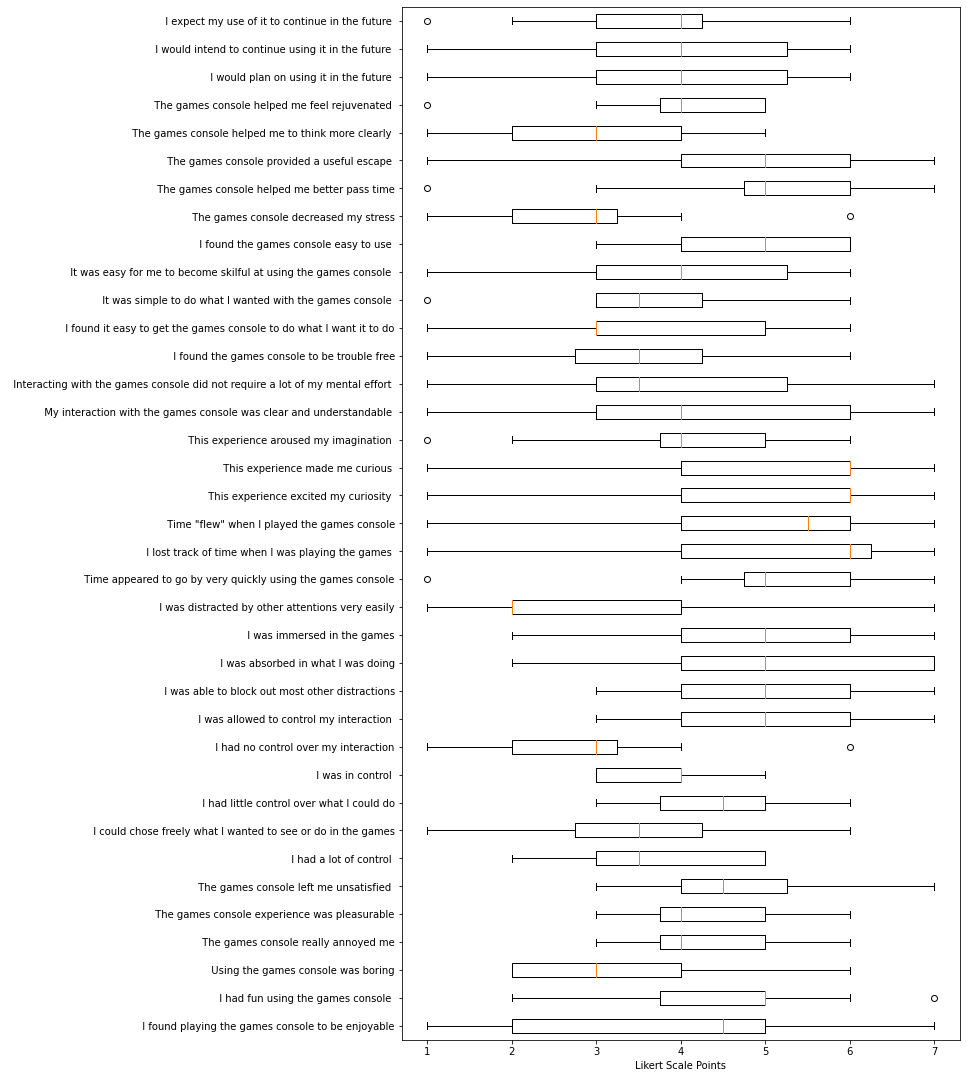

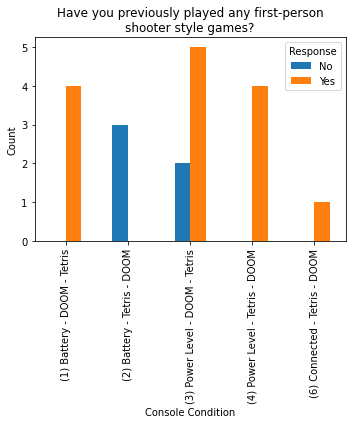

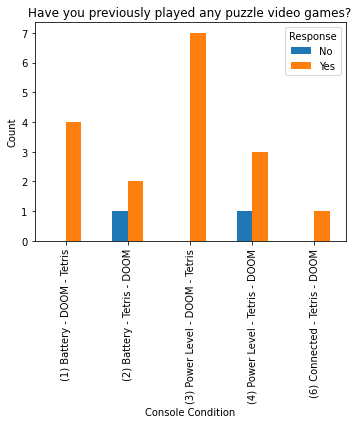

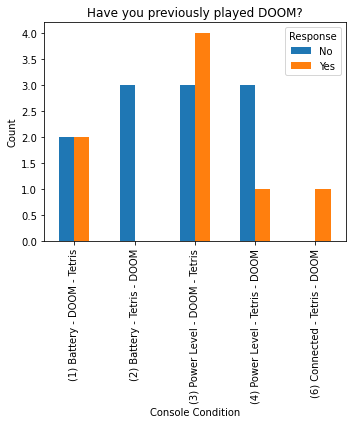

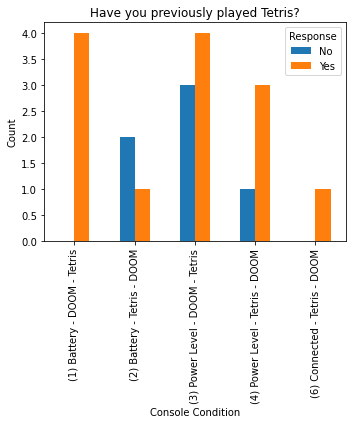

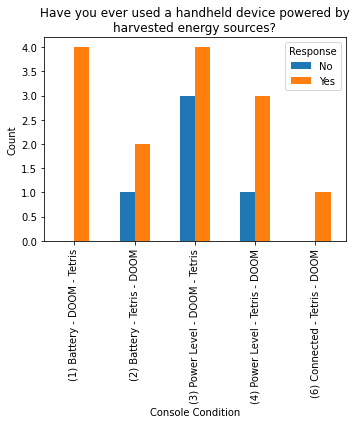

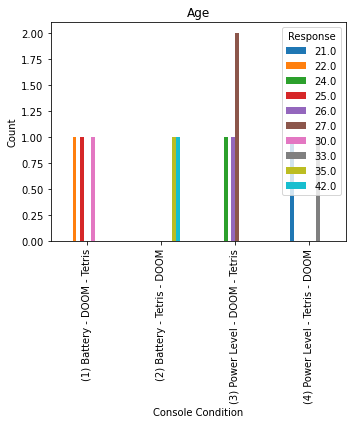

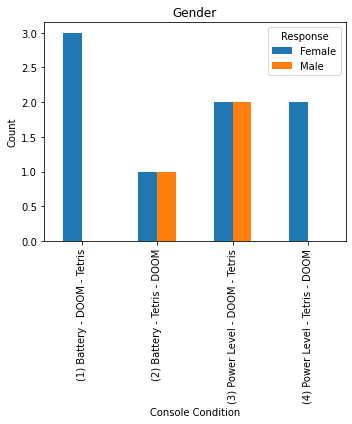

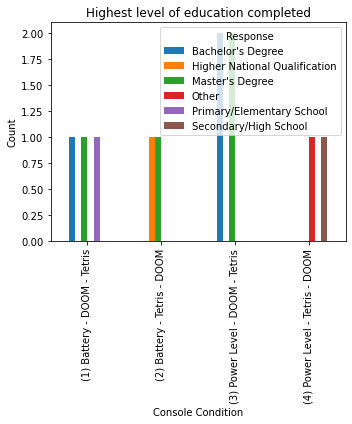

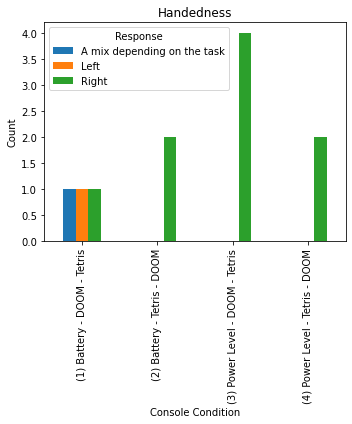

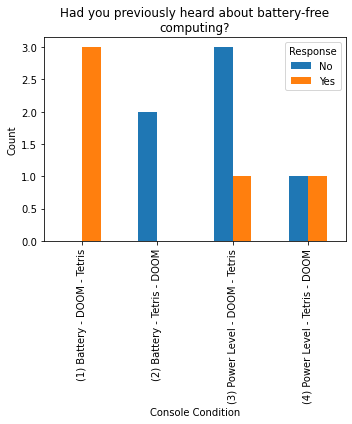

In [84]:
import pandas as pd
import sys
import textwrap
import matplotlib.pyplot as plt
                                        
                                            # Import data
                
    
# Import exit questions 
df = pd.read_csv('model_results.csv')  

# Import demographics 
da = pd.read_csv('demographics.csv')

#  Remove NANs from data
new_df = df.dropna()

                                        # Boxplots for Exit Data

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 19))

# Create a box plot for each column
ax.boxplot(new_df.values, vert=False)

# Set labels for the boxes
ax.set_yticklabels(df.columns)

# Set axis labels
ax.set_xlabel('Likert Scale Points')

# Show the plot
plt.show()

                                        # Bar Chart for Demographic Data
                                        # Find column names 

# Extract column names
#column_names = da.columns.tolist()

# Display the column names
#print(column_names)

                                        # Extracting Demographic Data

    
# Extract data for the order of participation
order = da['Which order are the participants following? ']

# Make participation data into a string
order_str = [str(val) for val in order]

# Extract data for yes/no playing fps 
fps_demo = da['Have you previously played any first-person shooter style games (on a phone, pc, tv, game console, etc.)? ']

# Extract data for yes/no playing puzzle video games
puzzle_demo = da['Have you previously played any\xa0puzzle video games (on a phone, pc, tv, game console, etc.)? ']

# Extract data for yes/no playing DOOM
doom_demo = da['Have you previously played the first-person shooter game DOOM (on a phone, pc, tv, game console, etc.)?']

# Extract data for yes/no playing Tetris
tetris_demo = da['\xa0Have you previously played the video game Tetris (on a phone, pc, tv, game console, etc.)?']

# Extract data for yes/no playing power harvesting handheld device
handheld_demo = da['Have you ever used a handheld device powered by harvested energy sources, such as solar panels or a crank handle (examples may include a hand powered flashlight or a calculator powered by a solar panel)? If yes, please specify the device(s) you have used in the comment section provided']

# Extract data for age
age_demo = da['What is your age?']

# Extract data for gender
gender_demo = da['Gender: How do you identify?']

# Extract data for Education
education_demo = da['What is the highest level of education you have completed? ']

# Extract data for handedness
handedness_demo = da['Which hand do you\xa0primarily use for fine motor tasks (such as writing)? ']

# Extract data for a prior knowledge
knowledge_demo = da['Had you previously heard about battery-free computing before the start of this study?']

# Create list of tuplets of variables
demo_variables = [
    ('fps_demo', fps_demo, 'Have you previously played any first-person shooter style games?'),
    ('puzzle_demo', puzzle_demo, 'Have you previously played any puzzle video games?'),
    ('doom_demo', doom_demo, 'Have you previously played DOOM?'),
    ('tetris_demo', tetris_demo, 'Have you previously played Tetris?'),
    ('handheld_demo', handheld_demo, 'Have you ever used a handheld device powered by harvested energy sources?'),
    ('age_demo', age_demo, 'Age'),
    ('gender_demo', gender_demo, 'Gender'),
    ('education_demo', education_demo, 'Highest level of education completed'),
    ('handedness_demo', handedness_demo, 'Handedness'),
    ('knowledge_demo', knowledge_demo, 'Had you previously heard about battery-free computing?')
]

                                            # Data Manipulation and Bar Charts

# Iterate through the list of tuples to generate plots for each variable
for var_name, var_data, var_title in demo_variables:
    
    # Create a new DataFrame with the extracted columns
    new_df = pd.DataFrame({'order': order_str, var_name: var_data})

    # Group by 'order' column and count occurrences of 'yes' and 'no' for each condition of order
    result = new_df.groupby('order')[var_name].value_counts().unstack(fill_value=0)

    # Plot result
    result.plot(kind='bar', stacked=False, figsize=(5, 6))

    # Wrap the long title text
    wrapped_title = '\n'.join(textwrap.wrap(var_title, width=50))
    
    #Details of graphs
    plt.title(wrapped_title)
    plt.xlabel('Console Condition')
    plt.ylabel('Count')
    plt.legend(title='Response')
    plt.tight_layout()
    plt.show()  # Show each plot separately






                                   


